In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from yahoo_fin.stock_info import get_data
import pandas as pd

In [2]:
#from datetime import datetime
import datetime
# get data until today
end1 = datetime.datetime.today()
#end = datetime(end1.year-7, end1.month-3, end1.day)
# get data two years from today
#start = datetime(end.year-1, end.month-3, end.day)


start = datetime.datetime(2019,6,1)
end = datetime.datetime(2022,6,1)




rate_gbpusd = get_data("GBPUSD=X",start_date=start,end_date=end,index_as_date = True, interval="1d")

In [3]:
rate_gbpusd.head()

,open,high,low,close,adjclose,volume,ticker
2019-06-02,1.264047,1.265823,1.261304,1.263951,1.263951,0,GBPUSD=X
2019-06-03,1.266304,1.270584,1.264462,1.266416,1.266416,0,GBPUSD=X
2019-06-04,1.270374,1.274405,1.269325,1.270277,1.270277,0,GBPUSD=X
2019-06-05,1.268681,1.274194,1.266961,1.268858,1.268858,0,GBPUSD=X
2019-06-06,1.269841,1.276178,1.268939,1.269841,1.269841,0,GBPUSD=X


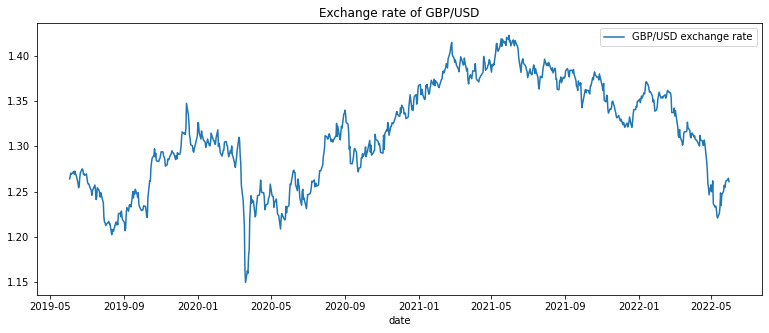

In [4]:
adj_rate = rate_gbpusd["adjclose"]
# print(adj_rate.max())
# print(adj_rate.min())
# print((adj_rate.max()-adj_rate.min())/adj_rate.min())
plt.figure(figsize=[13,5])
plt.title("Exchange rate of GBP/USD")
plt.xlabel("date")
plt.plot(adj_rate, label="GBP/USD exchange rate")
plt.legend()
plt.savefig("Exchange rate of GBPUSD from "+str(start)+" to "+str(end))
#plt.legend("GBP/USD exchange rate")

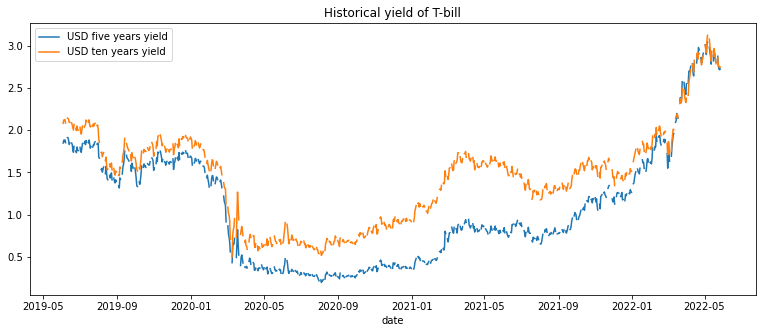

In [5]:
usd_five_years_yield = get_data("^FVX",start_date=start,end_date=end,index_as_date = True, interval="1d")
usd_ten_years_yield = get_data("^TNX",start_date=start,end_date=end,index_as_date = True, interval="1d")
#usd_thirty_years_yield = get_data("^TYX",start_date=start,end_date=end,index_as_date = True, interval="1d")
usd_five_years_yield.dropna()
usd_five = usd_five_years_yield['adjclose']
usd_ten_years_yield.dropna()
usd_ten = usd_ten_years_yield['adjclose']
#usd_thirty_years_yield.dropna()
#usd_thirty = usd_thirty_years_yield['adjclose']
plt.figure(figsize=[13,5])
plt.title("Historical yield of T-bill")
plt.xlabel("date")
plt.plot(usd_five, label="USD five years yield")
plt.plot(usd_ten, label="USD ten years yield")
#plt.plot(usd_thirty, label="USD thirty years yield")
plt.legend()
plt.savefig("Historical yield of T-bill from "+str(start)+" to "+str(end))

In [6]:
usd_ten.head()

2019-06-03    2.081
2019-06-04    2.119
2019-06-05    2.123
2019-06-06    2.124
2019-06-07    2.084
Name: adjclose, dtype: float64

In [7]:
gbp_yield = pd.read_csv("Bank of England  Database.csv")
#gbp_yield = pd.read_csv("Bank of England  Database.csv",index_col="Date")
gbp_yield["Date"] = pd.to_datetime(gbp_yield["Date"])
mask = (gbp_yield["Date"]>=start)&(gbp_yield["Date"]<=end)
gbp_yield = gbp_yield.loc[mask]
#gbp_yield.sort_values(by="Date")
gbp_yield.set_index("Date", inplace=True)
gbp_yield.head()

,IUDMNPY,IUDSNPY
Date,,
2022-06-01,2.1294,1.8093
2022-05-31,2.1072,1.7627
2022-05-30,1.9786,1.6792
2022-05-27,1.9216,1.6144
2022-05-26,1.9727,1.6680


-0.1426


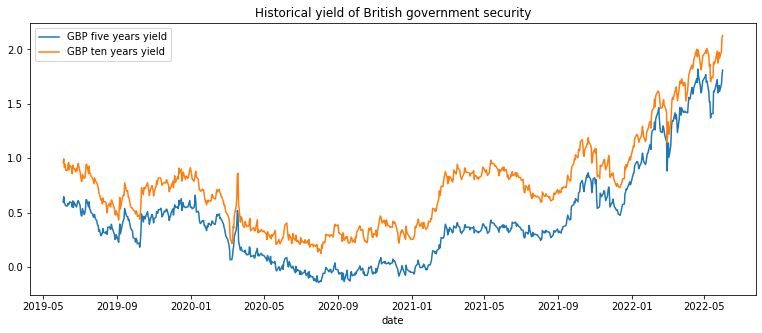

In [10]:
gbp_five = gbp_yield['IUDSNPY'].dropna()
gbp_ten = gbp_yield['IUDMNPY'].dropna()
print(gbp_five.min())
plt.figure(figsize=[13,5])
plt.title("Historical yield of British government security")
plt.xlabel("date")
plt.plot(gbp_five,label="GBP five years yield")
plt.plot(gbp_ten, label="GBP ten years yield")
plt.legend()
plt.savefig("Historical yield of British government security from "+str(start)+" to "+str(end))

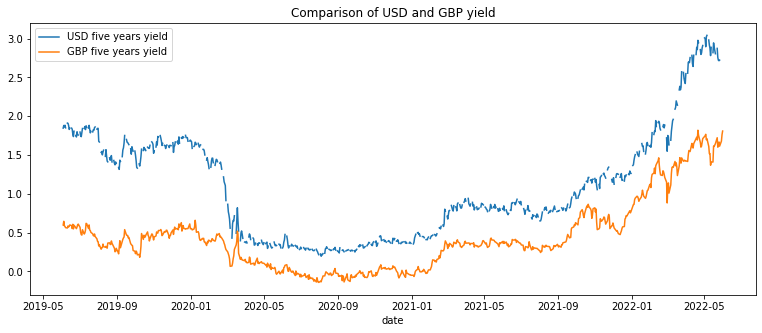

In [9]:
plt.figure(figsize=[13,5])
plt.title("Comparison of USD and GBP yield")
plt.plot(usd_five, label="USD five years yield")
#plt.plot(usd_ten, label="USD ten years yield")
plt.xlabel("date")
plt.plot(gbp_five, label="GBP five years yield")
#plt.plot(gbp_ten, label="GBP ten years yield")
plt.legend()
plt.savefig("Comparison of USD and GBP yield from "+str(start)+" to "+str(end))